In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [19]:
# Import the requests library.
import requests as req

# Import the API key.
from config import weather_api_key

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2f44f598292fd761188a9cd0103f3c0c


In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | okha
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | yatou
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | north bend
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | bababe
City not found. Skipping...
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | coquimbo
Processing Record 14 of Set 1 | conde
Processing Record 15 of Set 1 | srandakan
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | labutta
City not found. Skipping...
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | nikolskoye
Processing

Processing Record 35 of Set 4 | vila franca do campo
Processing Record 36 of Set 4 | cherskiy
Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | kismayo
City not found. Skipping...
Processing Record 39 of Set 4 | green river
Processing Record 40 of Set 4 | evensk
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | ust-ordynskiy
Processing Record 43 of Set 4 | solnechnyy
Processing Record 44 of Set 4 | guicheng
City not found. Skipping...
Processing Record 45 of Set 4 | giyon
Processing Record 46 of Set 4 | dauriya
Processing Record 47 of Set 4 | te anau
Processing Record 48 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 4 | urumqi
City not found. Skipping...
Processing Record 50 of Set 4 | maniitsoq
Processing Record 1 of Set 5 | hambantota
Processing Record 2 of Set 5 | usogorsk
Processing Record 3 of Set 5 | alotau
City not found. Skipping...
Processing Record 4 of Set 5 | jahrom
City not found. Skipping...
P

Processing Record 19 of Set 8 | tshikapa
Processing Record 20 of Set 8 | santa maria
Processing Record 21 of Set 8 | miraflores
Processing Record 22 of Set 8 | zvishavane
Processing Record 23 of Set 8 | ostrovnoy
Processing Record 24 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 25 of Set 8 | dakar
Processing Record 26 of Set 8 | blonduos
City not found. Skipping...
Processing Record 27 of Set 8 | waverly
Processing Record 28 of Set 8 | belfast
Processing Record 29 of Set 8 | oksfjord
Processing Record 30 of Set 8 | tefe
Processing Record 31 of Set 8 | bolsheustikinskoye
City not found. Skipping...
Processing Record 32 of Set 8 | robertsport
Processing Record 33 of Set 8 | abaete
Processing Record 34 of Set 8 | kloulklubed
Processing Record 35 of Set 8 | marsh harbour
Processing Record 36 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 8 | suffolk
Processing Record 38 of Set 8 | arlit
Processing Record 39 of Set 8 | labuhan
P

City not found. Skipping...
Processing Record 4 of Set 12 | voh
Processing Record 5 of Set 12 | meyungs
City not found. Skipping...
Processing Record 6 of Set 12 | usinsk
Processing Record 7 of Set 12 | rawson
Processing Record 8 of Set 12 | ouesso
Processing Record 9 of Set 12 | praia
Processing Record 10 of Set 12 | pouembout
Processing Record 11 of Set 12 | palmer
Processing Record 12 of Set 12 | kudahuvadhoo
Processing Record 13 of Set 12 | batagay-alyta
Processing Record 14 of Set 12 | camana
City not found. Skipping...
Processing Record 15 of Set 12 | cap malheureux
Processing Record 16 of Set 12 | barreirinhas
Processing Record 17 of Set 12 | dongsheng
Processing Record 18 of Set 12 | richards bay
Processing Record 19 of Set 12 | mugur-aksy
Processing Record 20 of Set 12 | senneterre
Processing Record 21 of Set 12 | anjozorobe
Processing Record 22 of Set 12 | phan thiet
Processing Record 23 of Set 12 | gainesville
Processing Record 24 of Set 12 | kamenka
Processing Record 25 of 

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.24,66.00,76,100,6.80,ZA,2020-01-06 06:16:20
1,Okha,53.59,142.95,23.90,91,98,13.69,RU,2020-01-06 06:16:20
2,Barrow,-38.31,-60.23,62.60,86,100,12.19,AR,2020-01-06 06:16:20
3,Kodiak,39.95,-94.76,34.00,79,1,9.17,US,2020-01-06 06:16:21
4,Yatou,3.63,9.81,78.80,94,40,2.33,CM,2020-01-06 06:16:21
5,Geraldton,49.72,-86.95,17.60,85,90,9.17,CA,2020-01-06 06:16:22
6,North Bend,43.41,-124.22,48.00,100,90,9.17,US,2020-01-06 06:15:50
7,Airai,-8.93,125.41,80.74,54,100,4.61,TL,2020-01-06 06:16:23
8,Puerto Ayora,-0.74,-90.35,75.99,81,3,5.99,EC,2020-01-06 06:16:23
9,Rikitea,-23.12,-134.97,76.26,75,32,15.14,PF,2020-01-06 06:16:23


In [24]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-01-06 06:16:20,-34.42,19.24,66.00,76,100,6.80
1,Okha,RU,2020-01-06 06:16:20,53.59,142.95,23.90,91,98,13.69
2,Barrow,AR,2020-01-06 06:16:20,-38.31,-60.23,62.60,86,100,12.19
3,Kodiak,US,2020-01-06 06:16:21,39.95,-94.76,34.00,79,1,9.17
4,Yatou,CM,2020-01-06 06:16:21,3.63,9.81,78.80,94,40,2.33
5,Geraldton,CA,2020-01-06 06:16:22,49.72,-86.95,17.60,85,90,9.17
6,North Bend,US,2020-01-06 06:15:50,43.41,-124.22,48.00,100,90,9.17
7,Airai,TL,2020-01-06 06:16:23,-8.93,125.41,80.74,54,100,4.61
8,Puerto Ayora,EC,2020-01-06 06:16:23,-0.74,-90.35,75.99,81,3,5.99
9,Rikitea,PF,2020-01-06 06:16:23,-23.12,-134.97,76.26,75,32,15.14


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1578292372.019647

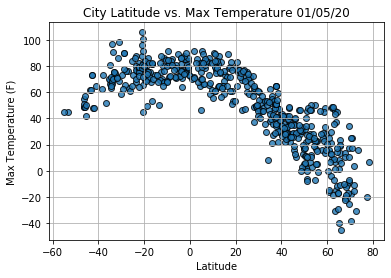

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

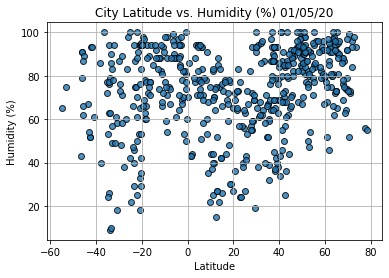

In [35]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

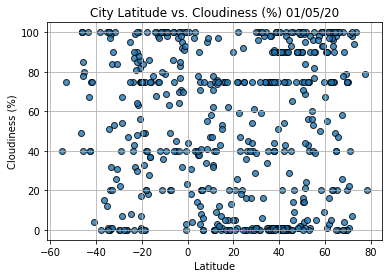

In [36]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

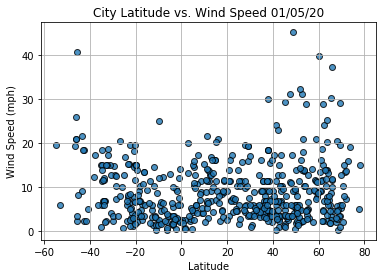

In [37]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()